# Today's Market

In this notebook, we'll take a look at today's market.

In [1]:
import pandas as pd
from fidap import fidap_client
import config

In [2]:
fidap = fidap_client(api_key=config.FIDAP_API_KEY)

## Aggregate statistics

First, let's get some aggregate statistics - how many companies there are, the total market cap, and the historical average volume.

In [3]:
df = fidap.sql("""SELECT count("ticker") ticker_count,
       sum("marketcap") / 1e12 marketcap_sum_tr,
       sum("mc_ch")/1e9 mc_ch_sum_bn, 
       (sum("mc_ch") / sum("marketcap")) * 100 as pct_mc_ch,
       avg("pc_1d") * 100 pc_1d_avg,
       stddev("pc_1d") * 100 dispersion,
       sum("revenueusd")/1e12 as revenue_usd_tr
FROM "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."tickers"
WHERE "marketcap" > 100e6;""")
df

,ticker_count,marketcap_sum_tr,mc_ch_sum_bn,pct_mc_ch,pc_1d_avg,dispersion,revenue_usd_tr
0,4149,49.512517,318.933517,0.644147,1.649616,3.651183,4.968079


In more readable terms - 

In [4]:
print("""
Number of companies: {}
Total market cap: {} trillion
""".format(df.loc[0,'ticker_count'], df.loc[0,'marketcap_sum_tr']))


Number of companies: 4149
Total market cap: 49.5125171 trillion



## Top companies

We can look at the top companies in several ways - by market cap, revenue, assets, etc. Here are some views - 

#### Top 10 By Market Cap

In [5]:
df_marketcap = fidap.sql("""SELECT "ticker", "name",  ROUND("marketcap"/1e12,2) as "marketcap_usd_trillion" FROM "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."tickers" WHERE "marketcap" IS NOT NULL ORDER BY "marketcap" DESC LIMIT 10;""")
df_marketcap

,ticker,name,marketcap_usd_trillion
0,AAPL,APPLE INC,2.02
1,MSFT,MICROSOFT CORP,1.75
2,AMZN,AMAZON COM INC,1.53
3,GOOGL,ALPHABET INC,1.37
4,FB,FACEBOOK INC,0.79
5,TSLA,TESLA INC,0.61
6,BABA,ALIBABA GRP HLDG LTD,0.60
7,BRK.B,BERKSHIRE HATHAWAY INC,0.58
8,JPM,JPMORGAN CHASE & CO,0.47
9,JNJ,JOHNSON & JOHNSON,0.43


#### Top 10 By Revenue

In [6]:
df_revenue = fidap.sql("""SELECT "ticker", "name", ROUND("revenueusd"/1e9,2) as "revenue_usd_billion" FROM "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."tickers" WHERE "revenueusd" IS NOT NULL ORDER BY "revenueusd" DESC LIMIT 10;""")
df_revenue

,ticker,name,revenue_usd_billion
0,WMT,WALMART INC,152.08
1,AMZN,AMAZON COM INC,125.56
2,AAPL,APPLE INC,111.44
3,BRK.B,BERKSHIRE HATHAWAY INC,103.74
4,TM,TOYOTA MTR CORP,78.74
5,CVS,CVS HLTH CORP,69.55
6,UNH,UNITEDHEALTH GRP INC,65.47
7,MCK,MCKESSON CORP,62.60
8,GOOGL,ALPHABET INC,56.90
9,ABC,AMERISOURCEBERGEN CORP,52.52


#### Top 10 Market Cap Percent Gainers

In [7]:
df_mc_pct_gainers = fidap.sql("""SELECT "ticker", "name", "marketcap"/1e9 as "marketcap_usd_billion", ROUND(100*DIV0("mc_ch","marketcap"),2) as "marketcap_pct_change" FROM "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."tickers" WHERE "marketcap" IS NOT NULL ORDER BY "marketcap_pct_change" DESC LIMIT 10;""")
df_mc_pct_gainers

,ticker,name,marketcap_usd_billion,marketcap_pct_change
0,RRTS,ROADRUNNER TRANS SYS INC,0.2005,66.35
1,PRQR,PROQR THERA N V,0.4991,62.32
2,KOSS,KOSS CORP,0.1965,57.13
3,GME,GAMESTOP CORP,12.8507,52.69
4,PFTI,PURADYN FILTER TECH INC,0.0011,45.45
5,CGIPQ,CELADON GRP INC,0.0002,40.00
6,CTAM,A M CASTLE & CO,0.0504,39.00
7,HWCC,HOUSTON WIRE & CABLE CO,0.0865,37.63
8,APOP,CELLECT BIO LTD,0.0186,36.68
9,ESMC,ESCALON MEDI CORP,0.0034,27.78


#### Top 10 Marketcap Percent Losers

In [8]:
df_mc_pct_losers = fidap.sql("""SELECT "ticker", "name", "marketcap"/1e9 as "marketcap_usd_billion", ROUND(100*DIV0("mc_ch","marketcap"),2) as "marketcap_pct_change" FROM "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."tickers" WHERE "marketcap" IS NOT NULL ORDER BY "marketcap_pct_change" ASC LIMIT 10;""")
df_mc_pct_losers

,ticker,name,marketcap_usd_billion,marketcap_pct_change
0,NMGX,NANO MAGIC HLDGS INC,0.0019,-72.62
1,AOLS,AEOLUS PHARMA INC,0.0006,-50.00
2,FPPP,FIELDPOINT PETR CORP,0.0002,-50.00
3,TXSO,TEXAS SOUTH ENGY INC,0.0020,-33.33
4,RYMM,ROYAL MINES & MINERALS CORP,0.0025,-33.33
5,HPR,HIGHPOINT RES CORP,0.0334,-28.44
6,TLRS,TIMBERLINE RES CORP,0.0228,-27.54
7,IPIC,IPIC ENTMT INC,0.0076,-26.67
8,EVFM,EVOFEM BIO INC,0.1421,-26.61
9,ADYX,ADYNXX INC,0.0014,-25.83


#### Top 10 Marketcap Gainers

In [9]:
df_mc_gains = fidap.sql("""SELECT "ticker", "name", "marketcap"/1e9 as "marketcap_usd_trillion", "mc_ch"/1e9 as "mc_ch_usd_billion" FROM "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."tickers" WHERE "marketcap" IS NOT NULL ORDER BY "mc_ch_usd_billion" DESC LIMIT 10;""")
df_mc_gains

,ticker,name,marketcap_usd_trillion,mc_ch_usd_billion
0,TSLA,TESLA INC,614.6806,9.869687
1,AAPL,APPLE INC,2024.4765,8.428997
2,GME,GAMESTOP CORP,12.8507,6.771339
3,BAC,BANK OF AMERICA CORP,325.1258,6.696358
4,JPM,JPMORGAN CHASE & CO,465.5073,5.964872
5,ORCL,ORACLE CORP,197.8970,5.330160
6,BEKE,KE HLDGS INC,67.4338,5.286422
7,WFC,WELLS FARGO & CO,162.4704,5.029252
8,HD,HOME DEPOT INC,320.0835,4.843621
9,BA,BOEING CO,144.1110,4.788842


#### Top 10 Marketcap Losers

In [10]:
df_mc_loses = fidap.sql("""SELECT "ticker", "name", "marketcap"/1e9 as "marketcap_usd_trillion", "mc_ch"/1e9 as "mc_ch_usd_billion" FROM "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."tickers" WHERE "marketcap" IS NOT NULL ORDER BY "mc_ch_usd_billion" ASC LIMIT 10;""")
df_mc_loses

,ticker,name,marketcap_usd_trillion,mc_ch_usd_billion
0,MSFT,MICROSOFT CORP,1752.3584,-23.219902
1,AMZN,AMAZON COM INC,1533.9891,-20.278806
2,BABA,ALIBABA GRP HLDG LTD,604.1280,-18.077265
3,BIDU,BAIDU INC,68.5087,-9.915846
4,FB,FACEBOOK INC,793.7595,-9.565401
5,NFLX,NETFLIX INC,222.7143,-7.675970
6,NKE,NIKE INC,202.7997,-6.883859
7,SHOP,SHOPIFY INC,130.0865,-5.213999
8,CRM,SALESFORCE COM INC,189.2102,-3.693360
9,NVDA,NVIDIA CORP,310.8742,-2.649426


#### Top 10 Industries By Marketcap

<AxesSubplot:ylabel='industry'>

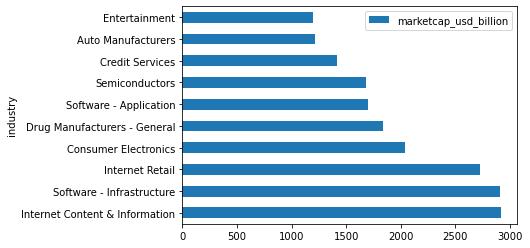

In [11]:
df_industries = fidap.sql("""SELECT "industry", COUNT("industry") as "count",SUM("marketcap"/1e9) as "marketcap_usd_billion", ROUND((SUM("mc_ch"/1e9)/"marketcap_usd_billion")*100,2) as "marketcap_pct_change" FROM "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."tickers" WHERE "marketcap" IS NOT NULL GROUP BY "industry" ORDER BY "marketcap_usd_billion" DESC LIMIT 10;""")
df_industries.set_index("industry", inplace=True)
df_industries.plot.barh(y='marketcap_usd_billion')

#### Top Sectors by Marketcap

<AxesSubplot:title={'center':'Marketcap by Sector'}, ylabel='marketcap_usd_billion'>

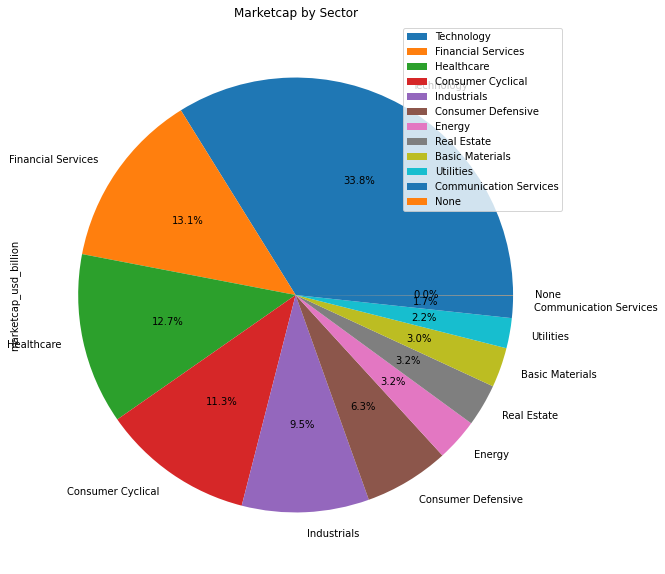

In [12]:
df_sectors = fidap.sql("""SELECT "sector", COUNT("sector") as "count", SUM("marketcap"/1e9) as "marketcap_usd_billion", ROUND((SUM("mc_ch"/1e9)/"marketcap_usd_billion")*100,2) as "marketcap_pct_change" FROM "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."tickers" WHERE "marketcap" IS NOT NULL GROUP BY "sector" ORDER BY "marketcap_usd_billion" DESC;""")
df_sectors.set_index("sector", inplace=True)
df_sectors.plot.pie(y='marketcap_usd_billion', figsize=(10,10), title="Marketcap by Sector", autopct='%1.1f%%')